<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Общий вывод:</a></span></li><li><span><a href="#-Комментарий-ревьюера" data-toc-modified-id="-Комментарий-ревьюера-3"><span class="toc-item-num">3&nbsp;&nbsp;</span> Комментарий ревьюера</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [3]:
#загрузим библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
model = pd.read_csv("/datasets/query_1.csv")
model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [6]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


В данном датафрейме 2 столбца и 8 строк, столбец с моделями самолетов и количеством рейсов этих моделей (тип данных целое число)

In [7]:
city = pd.read_csv("/datasets/query_3.csv")
city

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [8]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


В данном датафрейме 2 столбца и 101 строкf, столбец с названиями городов и средним количеством рейсов, прибывающих в город за день (тип данных число с плавающей точкой)

In [11]:
#изменим тип данных
city["average_flights"] = city["average_flights"].astype('int')
city.head()

,city,average_flights
0,Абакан,3
1,Анадырь,1
2,Анапа,2
3,Архангельск,5
4,Астрахань,2


In [15]:
# выберем топ-10 городов по количеству рейсов
top_10 = city.sort_values(by='average_flights', ascending=False).head(10).reset_index(drop=True)
top_10

,city,average_flights
0,Москва,129
1,Санкт-Петербург,31
2,Новосибирск,17
3,Екатеринбург,11
4,Красноярск,11
5,Пермь,10
6,Ростов-на-Дону,10
7,Брянск,10
8,Ульяновск,9
9,Советский,9


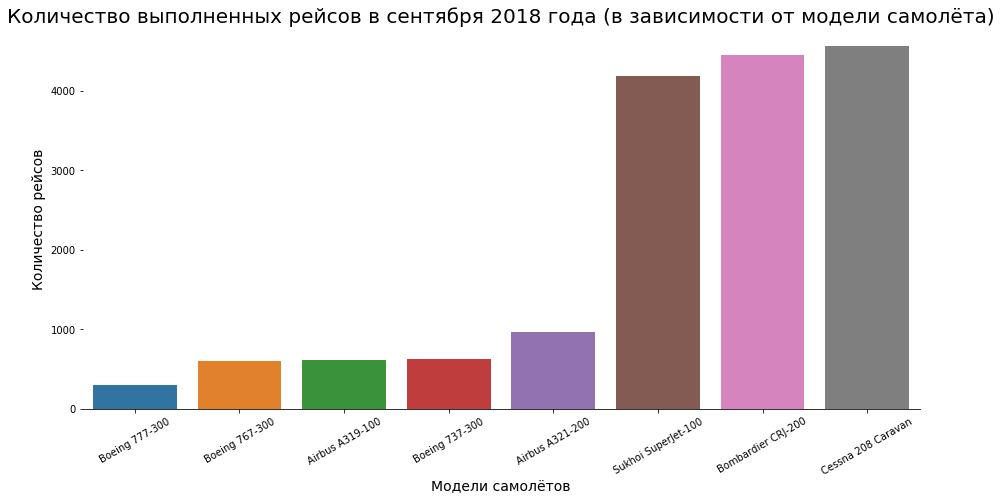

In [19]:
#Построим график модели самолётов и количество рейсов
plt.figure(figsize=(15, 7))
plt.title('Количество выполненных рейсов в сентября 2018 года (в зависимости от модели самолёта)', fontsize=20)
sns.barplot(x='model', y='flights_amount', data=model.sort_values(by='flights_amount'), label="line")
sns.despine(left=True)
plt.xlabel('Модели самолётов', fontsize=14)
plt.ylabel('Количество рейсов', fontsize=14)
plt.xticks(rotation=30)
plt.show()

**Вывод:**  
Самыми популярными моделями самолетов в сентябре 2018 года были модели: **Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100**

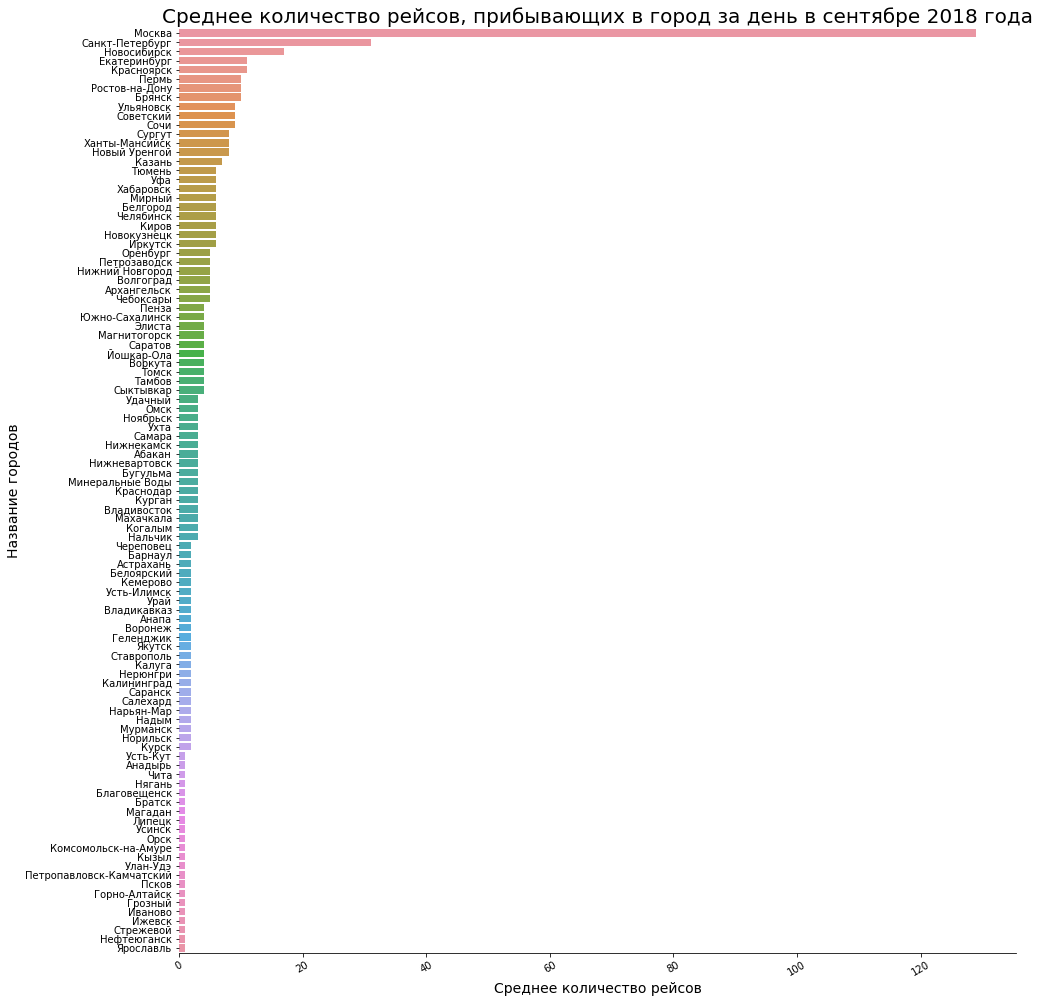

In [25]:
#Построим график города и количество рейсов
plt.figure(figsize=(15, 17))
plt.title('Среднее количество рейсов, прибывающих в город за день в сентябре 2018 года', fontsize=20)
sns.barplot(x='average_flights', y='city', data=city.sort_values(by='average_flights', ascending=False), label="line")
sns.despine(left=True)
plt.xlabel('Среднее количество рейсов', fontsize=14)
plt.ylabel('Название городов', fontsize=14)
plt.xticks(rotation=30)
plt.show()

**Вывод:**  
Из графика мы видим что самыми популярными городами в сентябре 2018 года были крупные города нашей страны такие как **Москва, Санкт-Петербург и Новосибирск**, а меньше всего летали в небольшие города такие как **Нефтеюганск, Ярославь**

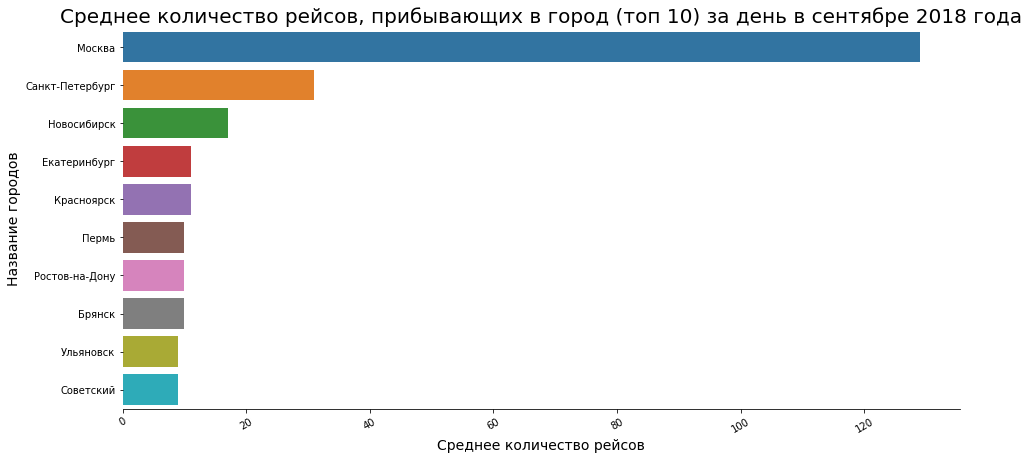

In [28]:
#Построим график топ-10 городов и количество рейсов
plt.figure(figsize=(15, 7))
plt.title('Среднее количество рейсов, прибывающих в город (топ 10) за день в сентябре 2018 года', fontsize=20)
sns.barplot(x='average_flights', y='city', data=top_10.sort_values(by='average_flights', ascending=False), label="line")
sns.despine(left=True)
plt.xlabel('Среднее количество рейсов', fontsize=14)
plt.ylabel('Название городов', fontsize=14)
plt.xticks(rotation=30)
plt.show()

**Вывод:**  
В топ-10 городов входят не такие большие города а именно **Пермь, Брянск, Ульяновск, Советский**

## Общий вывод:  
Мы загрузили наши данные и проанализировали их, как и ожидалось самыми популярными городами для перелета стали столица нашей Родины - Москва и северная столица - Санкт-Петербург, так же мы видим что спросом пользуются и более "мелкие" города такие как Брянск, Ульяновск, Советский